In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df  = pd.read_csv('manufacturing_polyregression.csv')
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


### Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
MinMax = MinMaxScaler()
transformed=MinMax.fit_transform(df)
transformed

array([[0.54880056, 0.15242192, 0.17150909, 0.36715316, 0.31655003,
        0.9999997 ],
       [0.71519447, 0.54055778, 0.48592513, 0.56478888, 0.51371193,
        0.99985559],
       [0.60275628, 0.14203364, 0.17750125, 0.41633875, 0.37420138,
        0.99999755],
       ...,
       [0.70678991, 0.5695555 , 0.50247279, 0.56090985, 0.50233436,
        0.9998921 ],
       [0.54518786, 0.94052867, 0.65148515, 0.50255781, 0.31287513,
        0.99999974],
       [0.31676187, 0.96664357, 0.5051865 , 0.33050943, 0.12920155,
        1.        ]])

In [7]:
data=pd.DataFrame(transformed)
data

,0,1,2,3,4,5
0,0.548801,0.152422,0.171509,0.367153,0.316550,1.000000
1,0.715194,0.540558,0.485925,0.564789,0.513712,0.999856
2,0.602756,0.142034,0.177501,0.416339,0.374201,0.999998
3,0.544870,0.939336,0.650537,0.501841,0.312555,1.000000
4,0.423628,0.539845,0.350975,0.298199,0.204011,1.000000
...,...,...,...,...,...,...
3952,0.284016,0.839727,0.423844,0.264799,0.109838,1.000000
3953,0.489233,0.164467,0.164466,0.315792,0.259436,1.000000
3954,0.706790,0.569555,0.502473,0.560910,0.502334,0.999892
3955,0.545188,0.940529,0.651485,0.502558,0.312875,1.000000


In [8]:
data.columns=('Temperature (°C)','Pressure (kPa)','Temperature x Pressure','Material Fusion Metric','Material Transformation Metric','Quality Rating')

In [9]:
data

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0.548801,0.152422,0.171509,0.367153,0.316550,1.000000
1,0.715194,0.540558,0.485925,0.564789,0.513712,0.999856
2,0.602756,0.142034,0.177501,0.416339,0.374201,0.999998
3,0.544870,0.939336,0.650537,0.501841,0.312555,1.000000
4,0.423628,0.539845,0.350975,0.298199,0.204011,1.000000
...,...,...,...,...,...,...
3952,0.284016,0.839727,0.423844,0.264799,0.109838,1.000000
3953,0.489233,0.164467,0.164466,0.315792,0.259436,1.000000
3954,0.706790,0.569555,0.502473,0.560910,0.502334,0.999892
3955,0.545188,0.940529,0.651485,0.502558,0.312875,1.000000


In [10]:
X=data.drop(['Quality Rating'], axis=1)
X

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,0.548801,0.152422,0.171509,0.367153,0.316550
1,0.715194,0.540558,0.485925,0.564789,0.513712
2,0.602756,0.142034,0.177501,0.416339,0.374201
3,0.544870,0.939336,0.650537,0.501841,0.312555
4,0.423628,0.539845,0.350975,0.298199,0.204011
...,...,...,...,...,...
3952,0.284016,0.839727,0.423844,0.264799,0.109838
3953,0.489233,0.164467,0.164466,0.315792,0.259436
3954,0.706790,0.569555,0.502473,0.560910,0.502334
3955,0.545188,0.940529,0.651485,0.502558,0.312875


In [11]:
y = data['Quality Rating']
y

0       1.000000
1       0.999856
2       0.999998
3       1.000000
4       1.000000
          ...   
3952    1.000000
3953    1.000000
3954    0.999892
3955    1.000000
3956    1.000000
Name: Quality Rating, Length: 3957, dtype: float64

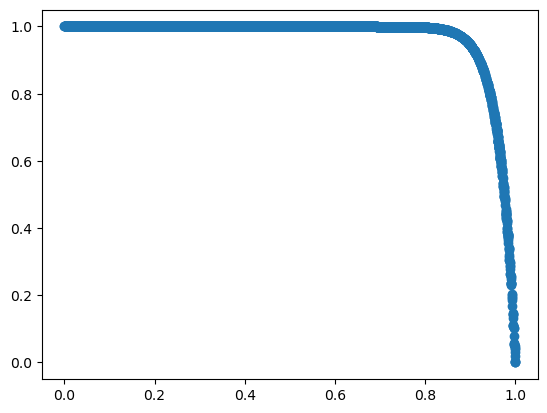

In [12]:
plt.scatter(X['Temperature (°C)'], y)

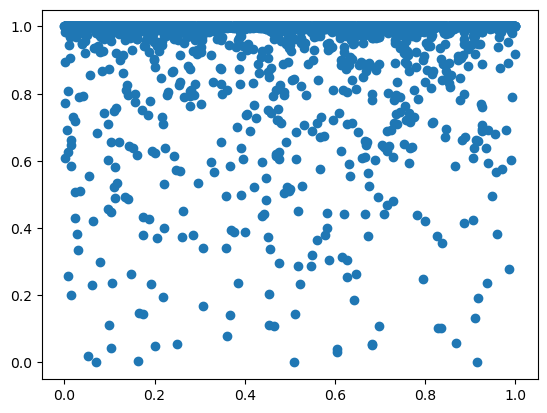

In [13]:
plt.scatter(X['Pressure (kPa)'],y)

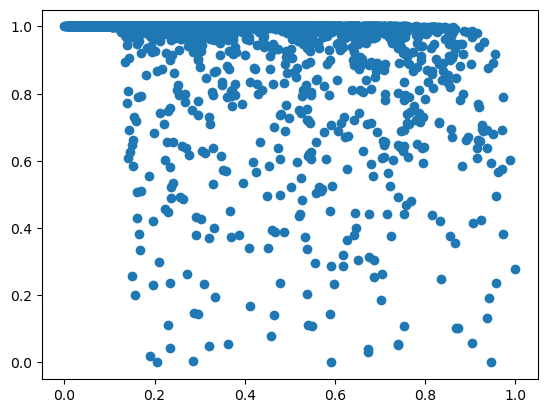

In [14]:
plt.scatter(X['Temperature x Pressure'],y)

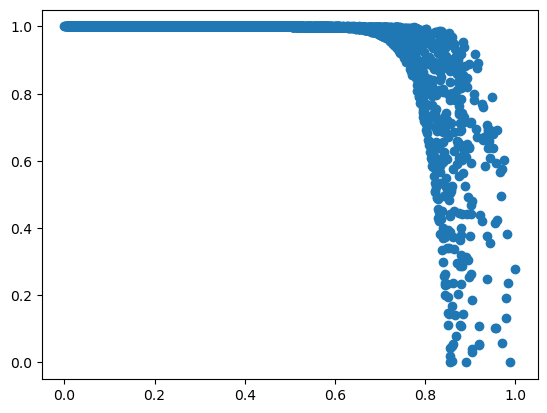

In [15]:
plt.scatter(X['Material Fusion Metric'],y)

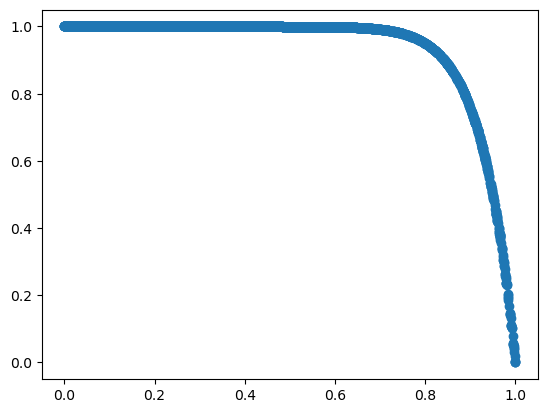

In [16]:
plt.scatter(X['Material Transformation Metric'],y)

In [17]:
X.drop(['Pressure (kPa)', 'Temperature x Pressure'], axis=1, inplace=True)

In [18]:
X

,Temperature (°C),Material Fusion Metric,Material Transformation Metric
0,0.548801,0.367153,0.316550
1,0.715194,0.564789,0.513712
2,0.602756,0.416339,0.374201
3,0.544870,0.501841,0.312555
4,0.423628,0.298199,0.204011
...,...,...,...
3952,0.284016,0.264799,0.109838
3953,0.489233,0.315792,0.259436
3954,0.706790,0.560910,0.502334
3955,0.545188,0.502558,0.312875


In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_regressor = PolynomialFeatures(degree=4)
X_poly = poly_regressor.fit_transform(X,y)
X_poly

array([[1.00000000e+00, 5.48800561e-01, 3.67153155e-01, ...,
        1.35076331e-02, 1.16459348e-02, 1.00408262e-02],
       [1.00000000e+00, 7.15194466e-01, 5.64788883e-01, ...,
        8.41805142e-02, 7.65676084e-02, 6.96431794e-02],
       [1.00000000e+00, 6.02756284e-01, 4.16338754e-01, ...,
        2.42719372e-02, 2.18153901e-02, 1.96074685e-02],
       ...,
       [1.00000000e+00, 7.06789910e-01, 5.60909854e-01, ...,
        7.93911151e-02, 7.11003459e-02, 6.36753770e-02],
       [1.00000000e+00, 5.45187863e-01, 5.02557808e-01, ...,
        2.47237377e-02, 1.53921448e-02, 9.58261754e-03],
       [1.00000000e+00, 3.16761875e-01, 3.30509425e-01, ...,
        1.82348891e-03, 7.12831680e-04, 2.78657578e-04]])

In [21]:
x_poly = pd.DataFrame(X_poly)
x_poly

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.548801,0.367153,0.316550,0.301182,0.201494,0.173723,0.134801,0.116222,0.100204,...,0.030180,0.027162,0.023418,0.020190,0.017408,0.018171,0.015667,0.013508,0.011646,0.010041
1,1.0,0.715194,0.564789,0.513712,0.511503,0.403934,0.367404,0.318986,0.290139,0.263900,...,0.134986,0.128849,0.117197,0.106598,0.096958,0.101752,0.092550,0.084181,0.076568,0.069643
2,1.0,0.602756,0.416339,0.374201,0.363315,0.250951,0.225552,0.173338,0.155795,0.140027,...,0.050874,0.043499,0.039097,0.035140,0.031583,0.030046,0.027005,0.024272,0.021815,0.019607
3,1.0,0.544870,0.501841,0.312555,0.296883,0.273438,0.170302,0.251844,0.156853,0.097690,...,0.029003,0.068864,0.042889,0.026712,0.016637,0.063426,0.039502,0.024603,0.015323,0.009543
4,1.0,0.423628,0.298199,0.204011,0.179461,0.126326,0.086425,0.088923,0.060836,0.041620,...,0.007469,0.011233,0.007685,0.005258,0.003597,0.007907,0.005410,0.003701,0.002532,0.001732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,1.0,0.284016,0.264799,0.109838,0.080665,0.075207,0.031196,0.070119,0.029085,0.012064,...,0.000973,0.005273,0.002187,0.000907,0.000376,0.004917,0.002039,0.000846,0.000351,0.000146
3953,1.0,0.489233,0.315792,0.259436,0.239349,0.154496,0.126925,0.099725,0.081928,0.067307,...,0.016110,0.015407,0.012658,0.010399,0.008543,0.009945,0.008170,0.006712,0.005514,0.004530
3954,1.0,0.706790,0.560910,0.502334,0.499552,0.396445,0.355045,0.314620,0.281764,0.252340,...,0.126057,0.124730,0.111704,0.100039,0.089592,0.098986,0.088649,0.079391,0.071100,0.063675
3955,1.0,0.545188,0.502558,0.312875,0.297230,0.273988,0.170576,0.252564,0.157238,0.097891,...,0.029096,0.069200,0.043081,0.026821,0.016698,0.063789,0.039713,0.024724,0.015392,0.009583


In [22]:
pd.DataFrame(y)

,Quality Rating
0,1.000000
1,0.999856
2,0.999998
3,1.000000
4,1.000000
...,...
3952,1.000000
3953,1.000000
3954,0.999892
3955,1.000000


In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_poly,y)

LinearRegression()

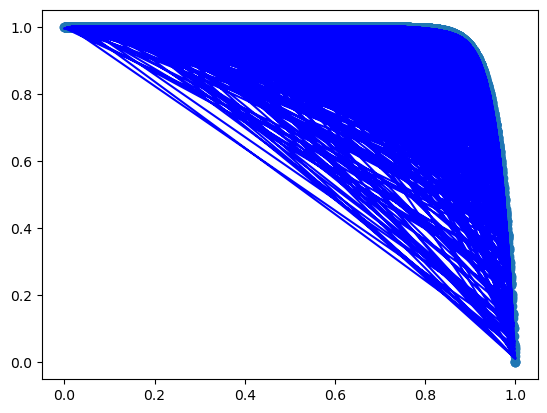

In [26]:
plt.scatter(pd.DataFrame(x_poly[1]),y)
plt.plot(X['Temperature (°C)'],regressor.predict(pd.DataFrame(x_poly)),color='blue')